# STINTSY Major Course Output

*S12 - Ryan Jay Deculawan, Hyenne Audrey Lim, Viktoria Lila Sicuan*

## 1. Introduction

TODO: *State chosen dataset and the problem to be addressed*

## 2. Description of the Dataset

TODO: *Describe dataset, discuss implications of data collection method, describe structure and features of the dataset*

In [3]:
#read csv file
data = pd.read_csv('sports.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uuid                    7000 non-null   object
 1   current_minute          7000 non-null   int64 
 2   home_score              7000 non-null   int64 
 3   away_score              7000 non-null   int64 
 4   home_yellow_cards       7000 non-null   int64 
 5   away_yellow_cards       7000 non-null   int64 
 6   home_red_cards          7000 non-null   int64 
 7   away_red_cards          7000 non-null   int64 
 8   home_attacks            7000 non-null   int64 
 9   away_attacks            7000 non-null   int64 
 10  home_dangerous_attacks  7000 non-null   int64 
 11  away_dangerous_attacks  7000 non-null   int64 
 12  home_corners            7000 non-null   int64 
 13  away_corners            7000 non-null   int64 
 14  home_off_target         7000 non-null   int64 
 15  away

## 3. List of Requirements

The following are the libraries and modules used to run the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## 4. Data Preprocessing and Cleaning

TODO: *Perform preprocessing and cleaning; move dropping < 0 minute rows here etc.*

## 5. Exploratory Data Analysis

### Calculating for Central Tendencies

In [49]:
central_tendencies = pd.DataFrame({
    'Mean': data.iloc[:, 1:].mean(),
    'Median': data.iloc[:, 1:].median(),
    'Mode': data.iloc[:, 1:].mode().iloc[0]
})
central_tendencies = central_tendencies.reset_index()
central_tendencies = central_tendencies.rename(columns={'index': 'Feature'})

In [50]:
central_tendencies

,Feature,Mean,Median,Mode
0,current_minute,59.491571,70.0,96
1,home_score,0.796000,0.0,0
2,away_score,0.623143,0.0,0
3,home_yellow_cards,0.522429,0.0,0
4,away_yellow_cards,0.603143,0.0,0
5,home_red_cards,0.009286,0.0,0
6,away_red_cards,0.015714,0.0,0
7,home_attacks,46.365429,43.0,0
8,away_attacks,43.325143,41.0,0
9,home_dangerous_attacks,27.611429,25.0,0


### Calculating for Dispersion, Skewness, and Kurtosis

In [64]:
'''
    Insert purpose of these 3 
    Dispersion
        - 
        -
    Skewness
        - 
    Kurtosis
        - 
'''

'\n    Insert purpose of these 3 \n    Dispersion\n        - \n        -\n    Skewness\n        - \n    Kurtosis\n        - \n'

In [65]:
# Create a DataFrame for variance and standard deviation
dispersion_metrics = pd.DataFrame({
    'Variance': data.iloc[:, 1:].var(),
    'Standard Deviation': data.iloc[:, 1:].std(),
    'Skewness': data.iloc[:, 1:].skew(),
    'Kurtosis': data.iloc[:, 1:].kurt()
})

In [66]:
dispersion_metrics = dispersion_metrics.reset_index()
dispersion_metrics = dispersion_metrics.rename(columns={'index': 'Feature'})

In [67]:
dispersion_metrics

,Feature,Variance,Standard Deviation,Skewness,Kurtosis
0,current_minute,1283.637877,35.827892,0.049441,11.811875
1,home_score,1.145976,1.070503,1.731428,3.950706
2,away_score,0.852386,0.923248,1.920947,5.296521
3,home_yellow_cards,0.850476,0.922212,2.173818,5.814726
4,away_yellow_cards,1.036367,1.018021,1.983351,4.371235
5,home_red_cards,0.009487,0.097399,10.695089,118.392716
6,away_red_cards,0.015755,0.125520,8.005468,64.326969
7,home_attacks,1296.353370,36.004908,0.596163,0.034330
8,away_attacks,1117.449632,33.428276,0.545940,-0.269246
9,home_dangerous_attacks,527.981295,22.977844,0.816644,0.454999


### Insights

Insert insights here

In [18]:
data.shape

(7000, 21)

In [143]:
len(data[ (data['current_minute'] > 105)])

167

In [103]:
#Handling Outliers
data[data['current_minute'] < 0]

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
1071,f36ec793-d162-437c-acb1-e650a38ef512,-348,0,3,1,2,0,0,90,50,...,25,4,3,12,2,5,4,60,40,1
1980,e98853d5-db8f-4d93-882b-78e01f63ddf5,-96,1,0,0,1,0,0,23,18,...,10,0,0,1,0,1,0,58,42,1
3300,d03f0776-4244-4cb7-b7ef-f7ecf19a6989,-1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,95,5,1
3360,6bbf7f66-3e0c-4f4f-a258-055411450432,-253,0,0,0,0,0,0,34,35,...,7,4,2,0,0,3,1,55,45,0
4639,a1f36e6d-1b3e-4c76-87fd-6d5c0109a437,-7,0,1,0,0,0,0,23,24,...,14,2,0,2,1,0,2,58,42,2
4863,5c5d6983-a830-4756-a210-96432c84cd69,-1,0,0,0,0,0,0,5,2,...,1,0,0,0,0,0,0,50,50,1
4989,6868d172-df91-4db2-835e-d1c49f97ce8d,-253,0,0,0,0,0,0,34,35,...,7,4,2,0,0,3,1,55,45,0
5410,0d3426bd-a197-4ca6-815a-c8cab7c161af,-139,0,0,0,0,0,0,9,2,...,1,0,0,0,0,0,0,75,25,3
5446,b08075cf-3c52-4703-818c-95247a28c6c2,-219,0,0,0,0,0,0,44,47,...,10,4,4,0,2,3,1,53,47,0
5700,50593611-23c0-4239-b8fb-df003f0cf9b2,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,3


In [104]:
#There are 14 instances where the current minute is <0. 
#Given that these are only 14, and our total data size is 7000, we can opt to remove them.

#First: Collect the indexes of the to-be-removed rows
indices = list(data[data['current_minute'] < 0].index)

#Second: remove the rows using .drop 
data = data.drop(indices)

In [106]:
#Now, lets check, if these outliers are still present.
data[data['current_minute'] < 0]
#Hooray (dejk) 

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta


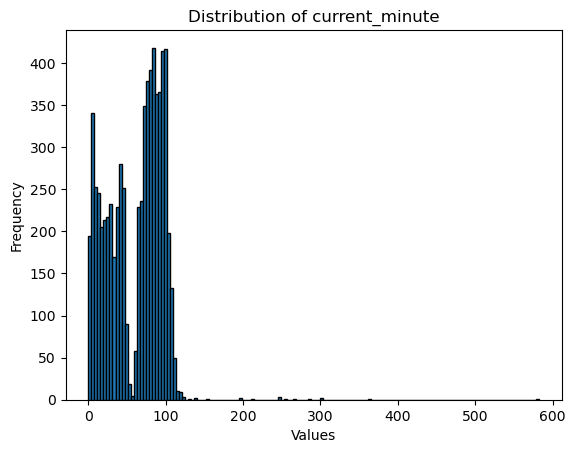

In [144]:
# Plot the histogram
def plot_histogram(col_name, bin_count = 5):
    data_for_hist = data[col_name]
    plt.hist(data_for_hist, bins=bin_count, edgecolor='black')

    # Add labels and a title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+col_name)

    # Display the plot
    plt.show()
    
plot_histogram('current_minute',150)

In [146]:
from collections import Counter

def check_value_counts(col_name, df_name =""):
    if(type(col_name) == str):
        value_counts = Counter(data[col_name])
        print(col_name+" value count:")
    else:
        value_counts = Counter(col_name)
        print(df_name+" value count:")
    value_counts = value_counts.most_common()

    # Display the counts
    for value, count in value_counts:
        print(f"{value}: {count}")
        
check_value_counts('home_red_cards')

home_red_cards value count:
0: 6922
1: 63
2: 1


In [107]:
score_snapshot = data[['home_score','away_score']]

In [108]:
score_snapshot

,home_score,away_score
0,1,2
1,2,0
2,0,0
3,0,0
4,1,0
...,...,...
6995,0,0
6996,3,0
6997,1,0
6998,2,0


In [110]:
score_snapshot.loc[:,('Difference')] = score_snapshot['home_score'] - score_snapshot['away_score'] 
score_snapshot.loc[:,('Difference')] = np.where(score_snapshot.loc[:,('Difference')] < 0, -1,
                                       np.where(score_snapshot.loc[:,('Difference')] > 0, 1,
                                                0))

In [111]:
score_snapshot

,home_score,away_score,Difference
0,1,2,-1
1,2,0,1
2,0,0,0
3,0,0,0
4,1,0,1
...,...,...,...
6995,0,0,0
6996,3,0,1
6997,1,0,1
6998,2,0,1


In [112]:
check_value_counts(score_snapshot['Difference'],"Difference")

Difference value count:
0: 3059
1: 2273
-1: 1654


In [113]:
score_snapshot

,home_score,away_score,Difference
0,1,2,-1
1,2,0,1
2,0,0,0
3,0,0,0
4,1,0,1
...,...,...,...
6995,0,0,0
6996,3,0,1
6997,1,0,1
6998,2,0,1


In [114]:
#Given the current minute, what is the average home score?
test_df = data[['current_minute','home_score']]

In [115]:
# Group the data by 'current_minute' and calculate the average home score
average_home_score = test_df.groupby('current_minute')['home_score'].mean()

In [ ]:
#Now, the average football game lasts about 90 - 95 minutes. Depending on the circumstance -- referees can extend this time.
#To give allowances to the number of games that are long but not too long, we need to find the optimal number of minutes that could capture games that extended.
'''
    We'll use 110 because from the 95 - 110 minute mark, there are about 1000+ entries (Confirm)
    While games that pass the 110 mark, are 63 entries in total.'''

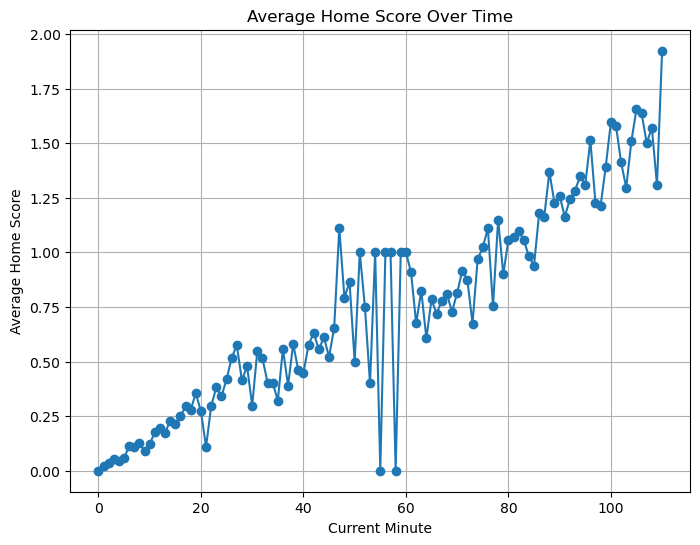

In [128]:
# Extract the 'current_minute' values and the corresponding averages
minutes = average_home_score[average_home_score.index <= 110].index
average_scores = average_home_score[average_home_score.index <= 110].values

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(minutes, average_scores, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Current Minute')
plt.ylabel('Average Home Score')
plt.title('Average Home Score Over Time')

# Show the plot
plt.grid()
plt.show()

In [129]:
#We could see that as the game progresses, the average score falls between 0 - 2 points.
#We could also see that there are outliers where it flattens or drops significantly. 

In [130]:
#Given the current minute, what is the average home score?
test_df = data[['current_minute','away_score']]

In [131]:
# Group the data by 'current_minute' and calculate the average home score
average_away_score = test_df.groupby('current_minute')['away_score'].mean()

In [132]:
#Now, the average football game lasts about 90 - 95 minutes. Depending on the circumstance -- referees can extend this time.
#To give allowances to the number of games that are long but not too long, we need to find the optimal number of minutes that could capture games that extended.
'''
    We'll use 110 because from the 95 - 110 minute mark, there are about 1000+ entries (Confirm)
    While games that pass the 110 mark, are 63 entries in total.'''

"\n    We'll use 110 because from the 95 - 110 minute mark, there are about 1000+ entries (Confirm)\n    While games that pass the 110 mark, are 63 entries in total."

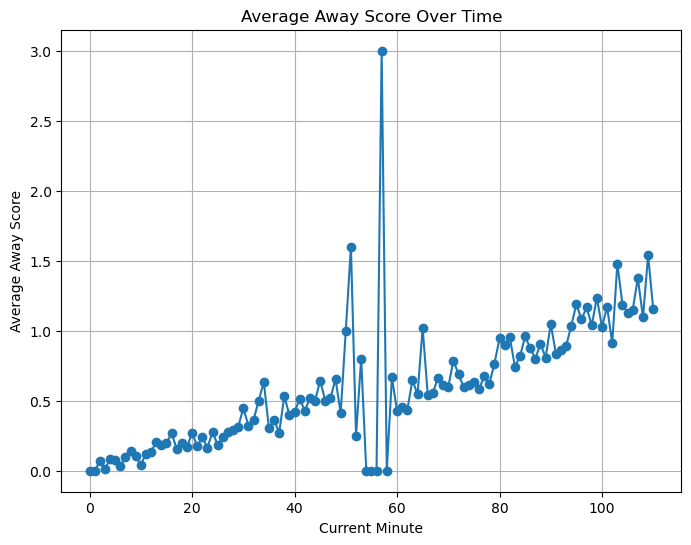

In [133]:
# Extract the 'current_minute' values and the corresponding averages
minutes = average_away_score[average_away_score.index <= 110].index
average_scores = average_away_score[average_away_score.index <= 110].values

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(minutes, average_scores, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Current Minute')
plt.ylabel('Average Away Score')
plt.title('Average Away Score Over Time')

# Show the plot
plt.grid()
plt.show()

In [136]:
average_away_score[average_away_score.index <= 110]

3.0

## 6. Model Training

Given our identified task of (insert task here), we selected the (model 1), (model 2), (model 3) models to address this.

**NOTE:** *Still unsure if we can use the following given that we need to identify at least the optimizer, learning rate, etc. hyperparameters for each model and not all have these hyperparameters.*

### K-Nearest Neighbors Mopdel

### Logistic Regression Model Training

### Neural Network Model Training

## 7. Hyperparameter Tuning

For hyperparameter tuning, we performed random search using the `RandomizedSearchCV` module.

TODO: *Explain the tuning method properly, state each model's hyperparameters and ranges, report and interpret performance of each model*

### K-Nearest Neighbors Hyperparameter Tuning

### Logistic Regression Hyperparameter Tuning

### Neural Network Model Hyperparameter Tuning

## 8. Model Selection

TODO: *Give summary of model configs., best hyperparameters, best model configuration and advantage over other configurations*

## 9. Insights and Conclusions

## 10. References